# 1. Introduction 

___

Milestone 2

Nama: Dwi Adhi Widigda Kartomihardjo

Batch: FTDS-27

Program ini dibuat untuk melakukan mengevaluasi pembelajaran fase 1 Hacktiv8 Fulltime Data Science.

___

## Dataset

Dataset yang digunakan untuk analisis ini diambil dari Used-car-catalog. Dataset ini terdiri dari 38532 baris dan 30 kolom. Dataset bisa di melalui link ini https://www.kaggle.com/datasets/lepchenkov/usedcarscatalog/data.

## Latar Belakang

Di Belarus, pasar mobil bekas cukup banyak peminatnya selain itu juga karena daya beli masyarakat menurun orang lebih memili membeli mobil bekas. Untuk menentukan harga mobil bekas untuk orang yang tidak mengerti mobil sulit karena tidak ada patokan nya. Saya sebagai data analyst akan membuat model untuk memprediksi harga mobil bekas untuk mempermudah orang-orang yang ingin menjual atau membeli mobil

## Problem Statement

Saya sebagai data analyst akan membuat model regresi untuk memprediksi harga jual mobil bekas. Sasaran nya adalah untuk mencapai nilai RMSE lebih kecil dari 1500 dollar dan nilai R2 sebesar 0.85 saat test data nya. Saya akan menggunakan 39000 baris data mobil bekas dari kaggle dan waktu analisis ini dikerjakan selama 2 minggu.

## Objektif

Tujuan dari projek ini adalah untuk membuat model yang dapat memprediksi harga mobil bekas

# 2. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import plotly_express as px
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

Program ini menggunakan libraries dari pandas, numpy, plotly_express, scipy, sklearn, matplotlib, seaborn, feature_engine, dan statsmodels.

# 3. Data Loading

In [3]:
data = pd.read_csv('cars.csv')
data

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [5]:
data.loc[data['price_usd'] == 1]

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
8230,ВАЗ,2105,mechanical,red,999999,1991,gasoline,False,gasoline,1.2,...,False,False,False,False,False,False,False,False,False,1
8770,Fiat,Palio,mechanical,red,260000,1998,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,False,2
16406,Volkswagen,T4 Caravelle,mechanical,white,1,1995,diesel,False,diesel,2.4,...,False,False,False,False,False,False,False,False,False,3
30149,Mazda,626,mechanical,black,300000,1987,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,False,True,0
36634,Peugeot,406,mechanical,blue,200000,1997,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,False,1


In [3]:
data.shape

(38531, 30)

Dataset ini terdiri dari 38531 baris dan 30 kolom

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

Keterangan setiap kolom ini adalah:

* manumanufacturer_name: Nama manufaktur mobil
* model_name: Nama model mobil
* transmission: Tipe kopling
* color: Warna mobil
* odometer_value: Status odometer dalam kilometer
* year_produced: Tahun mobil dibuat
* engine_fuel: Tipe bensin mobil
* engine_has_gas: Apakah mobil ada bensin?
* engine_type: Tipe mesin mobil
* engine_capacity: Kapasitas mesin dalam liter
* body_type: Jenis bentuk mobil
* has_warranty: Apakah mobil ada asuransi?
* state: Status mobil
* drivetrain: Sistem transmisi mobil
* price_usd: Harga mobil dalam USD
* is_exchangable: Apakah mobil siap di beli
* location_region: Lokasi mobil di jual
* number_of_photos: Jumlah banyak nya foto mobil
* up_counter: Jumlah berapa mobil di promosikan
* feature_1 to feature_9: Data dummy
* duration_listed: Berapa lama mobil di katalog


Dari summary informasi ini dataset terdiri dari:

* 13 tipe data bool
* 10 tipe data object
* 5 tipe data int64
* 2 tipe data float64

Terdapat missing value di kolom engine_capacity 

In [5]:
data.duplicated().sum()

np.int64(40)

In [6]:
data[data.duplicated()]

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
5767,Mitsubishi,Lancer,automatic,black,250000,2003,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,False,50
6556,Citroen,Xantia,mechanical,silver,520000,1998,diesel,False,diesel,2.1,...,True,False,False,False,False,False,False,False,False,16
9996,Ford,Scorpio,mechanical,yellow,55555,1995,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,False,False,1
11380,Ford,Transit,mechanical,grey,700000,2005,diesel,False,diesel,2.4,...,False,False,False,False,False,False,False,False,False,60
11704,Ford,Mondeo,mechanical,green,380000,1998,diesel,False,diesel,1.8,...,False,False,False,False,True,False,False,True,True,67
12810,Renault,19,mechanical,blue,99999,1992,gasoline,False,gasoline,1.7,...,False,False,False,False,False,False,False,False,False,3
17338,Volkswagen,Touareg,automatic,grey,337400,2008,diesel,False,diesel,2.5,...,True,True,False,False,True,False,False,True,True,11
18184,Volkswagen,Passat,mechanical,black,157000,2008,gasoline,False,gasoline,1.8,...,True,True,True,True,True,False,True,True,True,42
31993,Skoda,Rapid,automatic,silver,0,2019,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,False,3
32017,Skoda,Rapid,mechanical,blue,0,2019,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,False,3


Di dataset terdapat 40 data duplikat dan data ini akan dihapus dari dataframe.

In [3]:
data = data.drop_duplicates()

In [4]:
data.duplicated().sum()

np.int64(0)

Dataset sudah tidak ada data yang duplikat

In [5]:
data.isna().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

Terdapat 10 data yang missing value di kolom engine_capacity

# 4. Feature Engineering Part 1

In [6]:
pd.set_option('display.max_columns', None)

Set option untuk melihat semua kolom di dataset

In [7]:
data.loc[data['engine_capacity'].isna()]

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
8782,Fiat,500,automatic,orange,27000,2013,electric,False,electric,NaN,hatchback,False,owned,front,14900.0,True,Минская обл.,11,13,False,True,False,True,True,True,False,True,True,True,77
9048,Fiat,500,automatic,orange,49000,2014,electric,False,electric,NaN,hatchback,False,owned,front,16000.0,False,Минская обл.,18,1,False,False,False,True,False,True,False,True,False,True,11
24226,Chevrolet,Volt,automatic,silver,168000,2013,electric,False,electric,NaN,liftback,False,owned,front,12950.0,True,Минская обл.,21,5,False,False,False,True,False,False,False,True,True,True,6
25943,Nissan,Leaf,automatic,white,57357,2015,electric,False,electric,NaN,hatchback,False,owned,front,13850.0,False,Минская обл.,20,57,False,True,True,True,True,True,True,True,True,True,75
26203,Nissan,Leaf,automatic,blue,97400,2011,electric,False,electric,NaN,hatchback,False,owned,front,9300.0,True,Минская обл.,7,21,False,True,False,False,False,False,False,True,False,True,64
26222,Nissan,Leaf,automatic,white,50000,2014,electric,False,electric,NaN,hatchback,False,owned,front,12900.0,False,Минская обл.,12,7,False,True,False,False,False,True,False,True,True,False,18
26582,Nissan,Leaf,automatic,black,84000,2014,electric,False,electric,NaN,hatchback,False,owned,front,14500.0,False,Минская обл.,12,19,False,False,False,False,False,True,True,True,True,True,138
26914,Nissan,Leaf,automatic,black,84500,2013,electric,False,electric,NaN,hatchback,False,owned,front,15500.0,False,Брестская обл.,5,2,False,True,False,True,False,True,True,True,True,True,58
27554,BMW,i3,automatic,white,54150,2015,electric,False,electric,NaN,hatchback,False,owned,rear,24750.0,True,Минская обл.,23,17,False,True,True,True,False,True,True,True,True,True,18
29590,BMW,i3,automatic,other,67000,2018,electric,False,electric,NaN,liftback,False,owned,rear,39999.0,False,Минская обл.,6,2,False,True,True,True,True,True,True,True,True,True,57


Data ada missing value ini ada di kolom engine_capacity yaitu kapasitas mesin dalam liter. Tipe missing value di kolom ini adalah Missing Completely at Random karena missing value ini dapat di jelaskan dengan kolom lain engine_fuel. Mobil di baris ini adalah mobil listrik yang tidak mengunakan kapasitas mesin secara traditional seperti mobil gasoline yang menggunakan bensin. 

In [8]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
odometer_value,38491.0,249058.31,135918.33,0.0,158000.0,250000.0,325000.0,1000000.0
year_produced,38491.0,2002.93,8.06,1942.0,1998.0,2003.0,2009.0,2019.0
engine_capacity,38481.0,2.06,0.67,0.2,1.6,2.0,2.3,8.0
price_usd,38491.0,6632.81,6424.03,1.0,2100.0,4800.0,8950.0,50000.0
number_of_photos,38491.0,9.64,6.09,1.0,5.0,8.0,12.0,86.0
up_counter,38491.0,16.32,43.31,1.0,2.0,5.0,16.0,1861.0
duration_listed,38491.0,80.65,112.86,0.0,23.0,59.0,91.0,2232.0


Bedasarkan describe, nilai minimum untuk engine_capacity adalah 0.2 oleh karena itu missing value di engine_capacity akan diisi dengan 0.

In [9]:
data['engine_capacity'] = data['engine_capacity'].fillna(0)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22444\765938012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['engine_capacity'] = data['engine_capacity'].fillna(0)


In [10]:
data.isna().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
dtype: int64

Setelah di handle missing value nya, missing value nya 0

In [11]:
data['car_age'] = 2025 - data['year_produced']
data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22444\737715599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['car_age'] = 2025 - data['year_produced']


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,car_age
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16,15
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83,23
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151,24
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86,26
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,Минская обл.,5,85,False,True,False,False,True,True,False,False,True,True,301,25
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,Брестская обл.,4,20,False,True,False,False,True,True,False,False,True,True,317,21
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,Минская обл.,3,63,False,True,False,False,True,True,False,False,True,True,369,25
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,Брестская обл.,7,156,False,True,False,False,False,False,False,False,False,True,490,24


Kolom car_age dibuat untuk melihat umur setiap mobil.

# 5. EDA

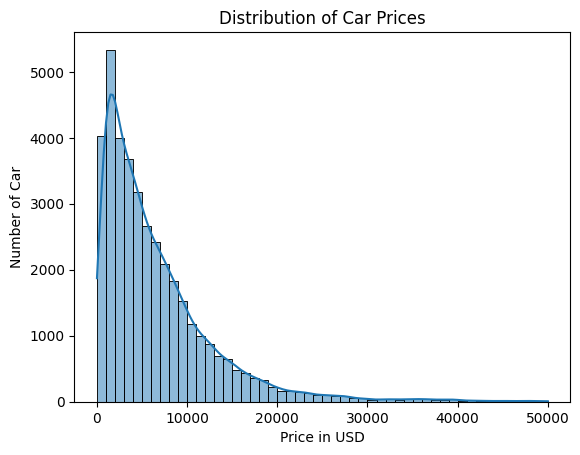

In [19]:
sns.histplot(data['price_usd'], bins=50, kde=True)
plt.xlabel('Price in USD')
plt.ylabel('Number of Car')
plt.title("Distribution of Car Prices")
plt.savefig('car_price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Cell berikut menggambarkan distribusi harga mobil bekas dalam histogram. Persebaran harga skew ke kiri dimana banyak mobil dijual dengan harga sekitar 5000 dolar. Semakin harga nya naik semakin sedikit mobil yang dijual. Bisa dibilang lebih banyak mobil umum yang dijual dibadingkan dengan mobil antik.

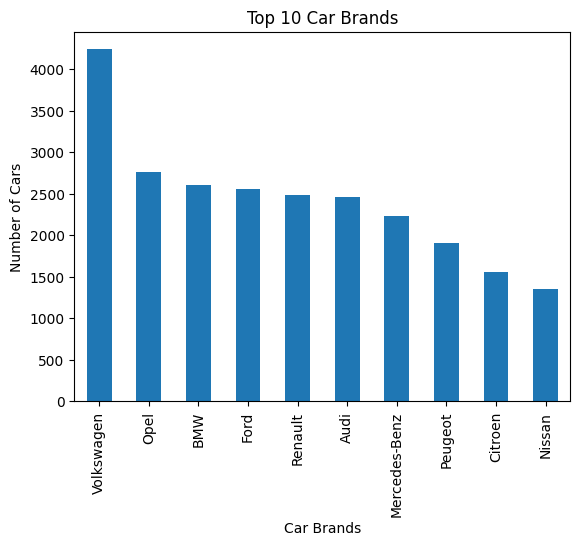

In [26]:
data['manufacturer_name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Car Brands')
plt.xlabel('Car Brands')
plt.ylabel('Number of Cars')
plt.savefig('top_10_car_brands.png', dpi=300, bbox_inches='tight')
plt.show()

Cell ini menampilkan 10 brand mobil yang popular dijual. Volkswagen adalah brand yang paling sering dijual dengan sebanyak 4000 model dan Nissan di urutan ke 10 dengan sekitar 1500 model yang dijual. Sebanyak 8 mobil Eropa, 1 mobil Amerika, dan 1 mobil Jepang. Bisa dibilang mobil Eropa lebih banyak peminat nya dibandingkan mobil Amerika dan Jepang.

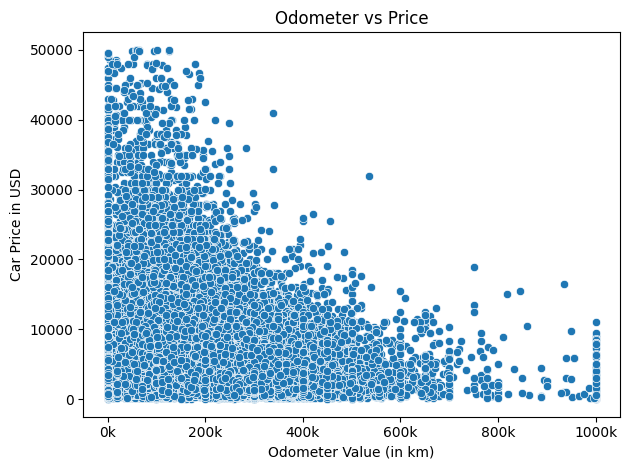

In [38]:
# sns.scatterplot(x='odometer_value', y='price_usd', data=data)
# plt.title("Odometer vs Price")
# plt.xlabel('Odometer Value')
# plt.ylabel('Car Price in USD')
# plt.show()
sns.scatterplot(x='odometer_value', y='price_usd', data=data)
plt.title("Odometer vs Price")
plt.xlabel('Odometer Value (in km)')
plt.ylabel('Car Price in USD')

# Format the x-axis to show full numbers with commas
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))

plt.tight_layout()
plt.savefig('odometer_vs_price.png', dpi=300, bbox_inches='tight')
plt.show()  

Cell ini menampilkan hubungan antara kolom odometer_value dengan price_usd menggunakan scatterplot. Terlihat ada korelasi negatif dimana semakin tinggi odometer_value semakin rendah harga mobil yang dijual. Bisa dibilang semakin sering dan lama mobil digunakan bedasarkan jarak tempuh nya semakin murah harga mobil nya.

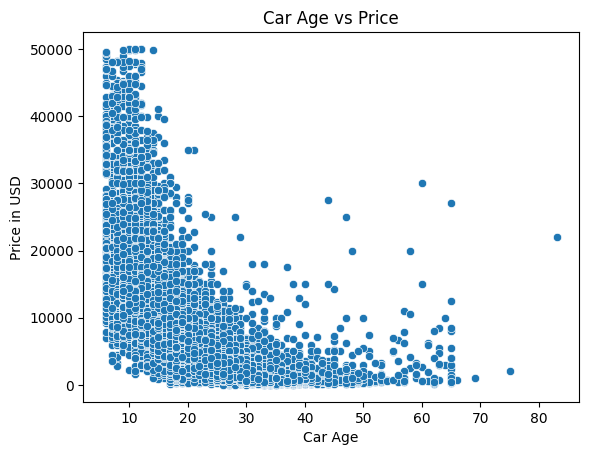

In [40]:
sns.scatterplot(x='car_age', y='price_usd', data=data)
plt.title("Car Age vs Price")
plt.xlabel('Car Age')
plt.ylabel('Price in USD')
plt.savefig('car_age_vs_price.png', dpi=300, bbox_inches='tight')
plt.show()

Cell ini menampilkan hubungan antara kolom car_age dengan price_usd menggunakan scatterplot. Bedasarkan scatterplot, banyak mobil dijual berurumur 10 sampai 30 tahun. Terlihat ada korelasi negatif dimana semakin tinggi car_age semakin rendah harga mobil yang dijual. Bisa dibilang semakin tua mobil, semakin murah harga mobil nya. Tetapi bedasarkan scarplot ada data point dimana umur mobil lebih dari 30 tahun tetapi harga jual nya lebih banyak. Bisa dibilang data point ini adalah mobil antik dimana umur tidak terlalu mempengaruhi harga jual.

Distribusi body_type

In [18]:
# body_type_vis = data.groupby('body_type')[['price_usd']].mean().reset_index()
# fig = px.pie(body_type_vis,values='price_usd',names='body_type',title='Proporsi Jenis Bentuk Mobil')
# fig.show()

body_type_vis = data.groupby('body_type')[['price_usd']].mean().reset_index()
fig = px.pie(body_type_vis, values='price_usd', names='body_type', title='Proportion of Car Body Type')

# Save as PNG (requires Kaleido)
fig.write_image("body_type_pie_chart.png", scale=2)  # High-res

# Optional: Show it
fig.show()


Cell ini menampilkan proporsi jenis mobil yang dijual. Terdapat 12 jenis mobil dan yang paling banyak adalah tipe suv sebanyak 14.3%, kedua adalah pickup 12.2%, dan ketiga adalah cabriolet atau roadster sebanyak 11.4%.

In [17]:
body_type_vis = data.groupby('drivetrain')[['price_usd']].mean().reset_index()
fig = px.pie(body_type_vis,values='price_usd',names='drivetrain',title='Proportion of Drivetrain')

fig.write_image("drivetrain_pie_chart.png", scale=2)  # High-res
fig.show()

Cell ini menampilkan proporsi jenis drive train yang dijual. Terdapat 3 jenis drive train yaitu all wheel drive, rear wheel drive dan front wheel drive. All wheel drive adalaha jenis drive train terbanyak dengan proporsi 54.2%. Front wheel dan Rear wheel memiliki proporsi yang hampir mirip. Bisa dibilang mobil dengan sistem all wheel drive lebih banyak peminat nya. Hal ini mungkin terkadi karena data di ambil di Belarus yang memiliki 4 musim. Mobil all wheel drive cenderung kokoh untuk banyak kondisi cuaca.

In [19]:
model_counts = data.groupby(['manufacturer_name', 'model_name']).size().reset_index(name='count')

top_models = model_counts.sort_values(by='count', ascending=False).head(50)

fig = px.treemap(
    top_models,
    path=['manufacturer_name', 'model_name'],  
    values='count',
    color='count',
    color_continuous_scale='viridis',
    title='Type of Model for Each Brand'
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.write_image("brand_carmodel_tree_map.png", scale=2)  # High-res
fig.show()

Cell ini menampilkan Tree Map untuk brand mobil dengan model yang sering dijual. Bedasarkan tree map ini, mobil yang banyak dijual adalah mobil sedan seperti model Passat, Astra, dan Mondeo. 

# 6. Feature Engineering Part 2

## Cek Cardinality

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38491 entries, 0 to 38530
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38491 non-null  object 
 1   model_name         38491 non-null  object 
 2   transmission       38491 non-null  object 
 3   color              38491 non-null  object 
 4   odometer_value     38491 non-null  int64  
 5   year_produced      38491 non-null  int64  
 6   engine_fuel        38491 non-null  object 
 7   engine_has_gas     38491 non-null  bool   
 8   engine_type        38491 non-null  object 
 9   engine_capacity    38491 non-null  float64
 10  body_type          38491 non-null  object 
 11  has_warranty       38491 non-null  bool   
 12  state              38491 non-null  object 
 13  drivetrain         38491 non-null  object 
 14  price_usd          38491 non-null  float64
 15  is_exchangeable    38491 non-null  bool   
 16  location_region    38491 no

In [13]:
kolom_kategoris = ['manufacturer_name','model_name','transmission','color','engine_fuel','engine_has_gas','engine_type','body_type','has_warranty', 'state', 'drivetrain']
listItem = []
for kolom in kolom_kategoris:
    listItem.append([kolom, data[kolom].nunique(), data[kolom].unique()])

pd.DataFrame(columns=['nama_kolom','jumlah_unique','nilai_unique'], data=listItem)

,nama_kolom,jumlah_unique,nilai_unique
0,manufacturer_name,55,"[Subaru, LADA, Dodge, УАЗ, Kia, Opel, Москвич,..."
1,model_name,1118,"[Outback, Forester, Impreza, Legacy, Tribeca, ..."
2,transmission,2,"[automatic, mechanical]"
3,color,12,"[silver, blue, red, black, grey, other, brown,..."
4,engine_fuel,6,"[gasoline, gas, diesel, hybrid-petrol, hybrid-..."
5,engine_has_gas,2,"[False, True]"
6,engine_type,3,"[gasoline, diesel, electric]"
7,body_type,12,"[universal, suv, sedan, hatchback, liftback, m..."
8,has_warranty,2,"[False, True]"
9,state,3,"[owned, emergency, new]"


Kolom manufacturer_name dan model_name memiliki kolom sebanyak 55 dan 1118 nilai yang unik. Kedua kolom ini memiliki kardinalitas yang sangat tinggi. Untuk hadle kedua kolom adalah dengan cara feature creation. Kolom baru akan dibuat untuk merepresentasikan kedua kolom ini.

In [14]:
brand_to_region = {
    # Russian
    'LADA': 'Russian', 'Москвич': 'Russian', 'УАЗ': 'Russian', 'ВАЗ': 'Russian', 
    'ЗАЗ': 'Russian', 'ГАЗ': 'Russian',

    # American
    'Dodge': 'American', 'Ford': 'American', 'Jeep': 'American', 'Cadillac': 'American',
    'Buick': 'American', 'Pontiac': 'American', 'Chevrolet': 'American', 'Lincoln': 'American', 
    'Chrysler': 'American',

    # Japanese
    'Subaru': 'Japanese', 'Acura': 'Japanese', 'Lexus': 'Japanese', 'Mitsubishi': 'Japanese', 
    'Toyota': 'Japanese', 'Nissan': 'Japanese', 'Suzuki': 'Japanese', 'Mazda': 'Japanese', 
    'Infiniti': 'Japanese', 'Honda': 'Japanese',

    # European
    'Dacia': 'European', 'Alfa Romeo': 'European', 'Opel': 'European', 'Citroen': 'European', 
    'Mini': 'European', 'Jaguar': 'European', 'Porsche': 'European', 'Fiat': 'European',
    'Renault': 'European', 'Seat': 'European', 'Rover': 'European', 'Volkswagen': 'European',
    'Audi': 'European', 'Volvo': 'European', 'BMW': 'European', 'Land Rover': 'European', 
    'Iveco': 'European', 'Saab': 'European', 'Mercedes-Benz': 'European', 'Peugeot': 'European',
    'Lancia': 'European', 'Skoda': 'Russian', 

    # South Korean
    'Kia': 'South Korean', 'SsangYong': 'South Korean', 'Daewoo': 'South Korean', 'Hyundai': 'South Korean',
    # Chinese
    'Geely': 'Chinese', 'Lifan': 'Chinese', 'Great Wall': 'Chinese', 'Chery': 'Chinese'
}

Setiap brand mobil di grouping bedasarkan region nya seperti brand Subaru di group sebagai mobil Japanese atau BMW sebagai mobil European. Dangan cara ini kardinalitas berkurang dari 55 dan 1118 nilai unik menjadi 6 nilai unik yang merepresentasikan setiap model.

In [15]:
data['manufacturer_region'] = data['manufacturer_name'].map(brand_to_region)
data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22444\2705788876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['manufacturer_region'] = data['manufacturer_name'].map(brand_to_region)


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,car_age,manufacturer_region
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16,15,Japanese
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83,23,Japanese
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151,24,Japanese
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86,26,Japanese
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7,24,Japanese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,Минская обл.,5,85,False,True,False,False,True,True,False,False,True,True,301,25,American
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,Брестская обл.,4,20,False,True,False,False,True,True,False,False,True,True,317,21,American
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,Минская обл.,3,63,False,True,False,False,True,True,False,False,True,True,369,25,American
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,Брестская обл.,7,156,False,True,False,False,False,False,False,False,False,True,490,24,American


Kolom manufacturer_region dibuat dari hasil mapping kolom manufacturer_name dengan dictionary brand_to_region.

## Splitting Dataset Menjadi X (Feature) dan y (target)

In [16]:
X = data.drop(['price_usd'],axis=1)
y = data['price_usd']

Kolom target adalah price_usd maka dataset data dipisah menjadi X yaitu dataset tanpa kolom price_usd dan y yaitu dataset hanya price_usd

In [17]:
X.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,car_age,manufacturer_region
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16,15,Japanese
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83,23,Japanese
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151,24,Japanese
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86,26,Japanese
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7,24,Japanese


In [18]:
X_train,X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state= 42)
print('Train_set', X_train.shape)
print('Test_set', X_test.shape)

Train_set (30792, 31)
Test_set (7699, 31)


Feature dan target dipisah menjadi Train dan Test dengan ratio 80:20 dan random state yang digunakan adalah 42

## Handle Outlier

In [19]:
skewness = ''
listItem = []
kolom_numerik = ['odometer_value','year_produced','engine_capacity','number_of_photos','up_counter','duration_listed','car_age']
for kolom in kolom_numerik:
    if  -0.5 <= round(X_train[kolom].skew(),2) <= 0.5:
        skewness = 'normal'
    else:
        skewness = 'skew'
    listItem.append([kolom, round(X_train[kolom].skew(),2), skewness]) 
df_skew = pd.DataFrame(columns=['nama_kolom','nilai_skew','distribusi'],data=listItem)
df_skew

,nama_kolom,nilai_skew,distribusi
0,odometer_value,1.20,skew
1,year_produced,-0.40,normal
2,engine_capacity,2.01,skew
3,number_of_photos,1.60,skew
4,up_counter,13.50,skew
5,duration_listed,6.94,skew
6,car_age,0.40,normal


Majoritas kolom numerik di Train skew dan akan dihandle dengan metode Tukey's Law karena distribusi data nya tidak normal.

In [20]:
column = []
lower_bound = []
upper_bound = []
percentage_outlier = []

for row in range(0, len(df_skew)):
    col = df_skew['nama_kolom'][row]

    if df_skew['distribusi'][row] == 'skew':
        IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
        if -1 < df_skew['nilai_skew'][row] < 1:
            lower_boundary = X_train[col].quantile(0.25) - (IQR * 1.5)
            upper_boundary = X_train[col].quantile(0.75) + (IQR * 1.5)
        else:
            lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
            upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
    else:
        lower_boundary = X_train[col].mean() - 3 * X_train[col].std()
        upper_boundary = X_train[col].mean() + 3 * X_train[col].std()

    column.append(col)
    lower_bound.append(lower_boundary)
    upper_bound.append(upper_boundary)
    total_outlier = (len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100)
    percentage_outlier.append(total_outlier)

outlier = pd.DataFrame({
    'column':column,
    'upper_boundary': [round(val,2)  for val in upper_bound],
    'lower_boundary': [round(val,2) for val in lower_bound],
    'percantage_outlier': [round(val,2) for val in percentage_outlier]
    })
outlier

,column,upper_boundary,lower_boundary,percantage_outlier
0,odometer_value,819000.00,-336000.00,0.67
1,year_produced,2027.13,1978.77,0.43
2,engine_capacity,4.40,-0.50,1.65
3,number_of_photos,33.00,-16.00,0.40
4,up_counter,58.00,-40.00,5.12
5,duration_listed,295.00,-181.00,2.90
6,car_age,46.23,-2.13,0.43


In [21]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
odometer_value,38491.0,249058.31,135918.33,0.0,158000.0,250000.0,325000.0,1000000.0
year_produced,38491.0,2002.93,8.06,1942.0,1998.0,2003.0,2009.0,2019.0
engine_capacity,38491.0,2.06,0.67,0.0,1.6,2.0,2.3,8.0
price_usd,38491.0,6632.81,6424.03,1.0,2100.0,4800.0,8950.0,50000.0
number_of_photos,38491.0,9.64,6.09,1.0,5.0,8.0,12.0,86.0
up_counter,38491.0,16.32,43.31,1.0,2.0,5.0,16.0,1861.0
duration_listed,38491.0,80.65,112.86,0.0,23.0,59.0,91.0,2232.0
car_age,38491.0,22.07,8.06,6.0,16.0,22.0,27.0,83.0


Kolom engine capacity memiliki persentase outlier sebesar 1.65%, nilai minimum 0, nilai rata-rata 2.06, nilai tengah 2, maksimum nya 8 dan upper boundary nya 4.4. Nilai maksimum ini sangat jauh dari rata-rata, nilai tengah dan, upper boundary oleh karena itu kolom ini akan di capping. Kolom up_counter memiliki persentase 5.12% dan lebih besar dari 5% tetapi kolom ini tidak akan digunakan karena ini bukun fitur mobil melainkan fitur dari website mobil di jual. Sisa kolom memiliki persentase outlier dibawah 5% oleh karena itu outlier tidak perlu di handle.

In [22]:
X_train.loc[X_train['engine_capacity'] == 8]

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,car_age,manufacturer_region
23344,ГАЗ,69,mechanical,green,60,1980,gasoline,False,gasoline,8.0,suv,False,owned,all,True,Минская обл.,6,120,False,False,False,False,False,False,False,True,False,True,930,45,Russian


Ini adalah mobil dengan engine capacity 8. Mobil ini merupakan outlier.

In [23]:
winsorizer= Winsorizer(capping_method='iqr',
                        tail='both',
                        fold = 3,
                        variables=['engine_capacity'])

Metode hadle outlier menggunakan winsorizer dengan metode iqr distribusi nya skew dan fold 3 karena nilai outlier ekstrem.

## Feature Selection

In [24]:
X_train = X_train.drop(columns=['manufacturer_name','model_name','location_region','number_of_photos','up_counter','feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','duration_listed'],)
X_test = X_test.drop(columns=['manufacturer_name','model_name','location_region','number_of_photos','up_counter','feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','duration_listed'],)

Kolom manufacturer_name dan model_name tidak digunakan karena sudah di representasikan oleh kolom manufacturer_region. Kolom location_region, number_of_photos, dan up_counter adalah fitur dari website dan bukan fitur langsung dari mobil dan akan di drop. Kolom feature_0 samapi feature_9 adalah kolom dummy oleh karena itu kolom-kolom ini akan di drop

## Feature Scaling

In [25]:
scaler = StandardScaler()

Scaling yang digunakan adalah StandardScaler karena setelah capping kolom engine_cap harus distribusi nya sudah normal dan majoritas 

## Feature Encoding

In [26]:
encoder = OneHotEncoder(handle_unknown='ignore')

Encoding menggunakan OneHotEncoder karena semua kolom kategorikal nominal. Paremeter handle_unknown digunakan jika ada nilai yang ada di train tapi tidak ada ditest agar tidak error.

## Pipeline 


In [27]:
#Making column transformer for preprocessing
kolom_kategoris = ['transmission','color','engine_fuel','engine_has_gas','engine_type','body_type','has_warranty', 'state', 'drivetrain','is_exchangeable','manufacturer_region']
kolom_numerik = ['odometer_value','year_produced','engine_capacity','car_age']

numerik_pipe = Pipeline([('capping',winsorizer), ('scaling',scaler)])
kategori_pipe = Pipeline([('encoding',encoder)])

preprocessor = ColumnTransformer([('pipe_numerik',numerik_pipe, kolom_numerik), ('pipe_kategori',kategori_pipe,kolom_kategoris)])

Pipeline numerik_pipe adalah pipeline untuk kolom numerik. Di pipeline feature akan di capping terlebih dahulu setelah capping di scaling.
Pipeline kategori_pipe adalah pipeline unutk kolom kategori. Di pipeline ini feature hanya di encoding saja.

Variable preprocessor adalah gabungan pipeline numerik_pipe dan kategori_pipe.

# 7. Model Definition

KNN
SVM
Decision Tree
Random Forest
Boosting(Xgboost)

In [28]:
knr = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
xgb_r = XGBRegressor()


Dalam program ini saya menggunakan model KNeighborRegressor, SVR, DecisionTreeRegressor, RandomForestRegressor, XGBRegressor.

In [29]:
# Pipeline KNR
pipe_knr =Pipeline([
    ('preprocessing',preprocessor),
    ('regressor', knr)
])

# Pipeline SVR
pipe_svr = Pipeline([
    ('preprocessing',preprocessor),
    ('regressor', svr)
])

# Pipeline Decision Tree
pipe_dtr = Pipeline([
    ('preprocessing',preprocessor),
    ('regressor', dtr)
])

# Pipeline Random Forest Regressor
pipe_rfr = Pipeline([
    ('preprocessing',preprocessor),
    ('regressor', rfr)
])

# Pipeline Xgboost
pipe_xgb_r = Pipeline([
    ('preprocessing',preprocessor),
    ('regressor', xgb_r)
])



Setiap model saya buat pipeline nya sendiri seperti pipe_xgb_r adalah pipeline untuk model XGBRegressor.

# 8. Base Model Evaluation

Untuk model evaluation saya akan menggukan R2 dan RMSE. R2 digunakan untuk mengevaluasi performa model dimana nilai mendekati 1 artinya model mempelajari data dengan akurat. RMSE digunakan untuk mengevaluasi hasil prediksi target. Untuk kasus isi RMSE cocok digunakan karena target di kasus ini adalah harga mobil dalam ribuan dolar USD dan perbedaan yang tinggi bisa terlihat mahal.  

## KNeighborsRegressor

In [192]:
# Model Training
pipe_knr.fit(X_train, y_train)
print('Training Score: ',round(pipe_knr.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_knr.score(X_test, y_test),4))

Training Score:  0.8934
Testing Score:  0.8321


Bedasarkan nilai R2, score train sebesar 0.89 dan score test sebesar 0.83 dengan selisih 0.06. Bisa dibilang model ini goodfit karena nilai R2 mendekati 1 dan selisih antara train dan test cukup kecil.

In [193]:
# Model Prediction
y_train_pred = pipe_knr.predict(X_train)
y_test_pred = pipe_knr.predict(X_test)

In [194]:
# Model Evaluation
rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)

print(f'Nilai rmse train: {rmse_train}')
print(f'Nilai rmse test: {rmse_test}')

Nilai rmse train: 2102.5090084619424
Nilai rmse test: 2605.4328045555108


Untuk cross validation saya menggunakan 5 fold untuk semua model.

In [30]:
# Cross Validation
cv = 5
scores = cross_val_score(pipe_knr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
rmse_scores = -scores
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Mean RMSE: {mean_rmse}')
print(f'Stadard deviation: {std_rmse}')
print('RMSE Score - Range of Test-Set       : ', (mean_rmse-std_rmse) , '-', (mean_rmse+std_rmse))

Mean RMSE: 2617.0194091299527
Stadard deviation: 95.00393112928857
RMSE Score - Range of Test-Set       :  2522.015478000664 - 2712.023340259241


## Support Vector Regression

In [196]:
# Model Training
pipe_svr.fit(X_train, y_train)
print('Training Score: ',round(pipe_svr.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_svr.score(X_test, y_test),4))

Training Score:  0.256
Testing Score:  0.266


Bedasarkan nilai R2, score train sebesar 0.25 dan score test sebesar 0.26 dengan selisih 0.01. Bisa dibilang model ini underfit karena nilai R2 kurang dari 0.5 walaupun selisih model kecil.

In [197]:
# Model Prediction
y_train_pred = pipe_svr.predict(X_train)
y_test_pred = pipe_svr.predict(X_test)

In [198]:
# Model Evaluation
rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)

print(f'Nilai rmse train: {rmse_train}')
print(f'Nilai rmse test: {rmse_test}')

Nilai rmse train: 5554.646430258892
Nilai rmse test: 5448.128474459739


In [ ]:
# Cross Validation
cv = 5
scores = cross_val_score(pipe_svr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
rmse_scores = -scores
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Mean RMSE: {mean_rmse}')
print(f'Stadard deviaation: {std_rmse}')
print('RMSE Score - Range of Test-Set       : ', (mean_rmse-std_rmse) , '-', (mean_rmse+std_rmse))

Mean RMSE: 5723.157798794955
Stadard deviaation: 142.67571301144838
F1 Score - Range of Test-Set       :  -5865.833511806403 - -5580.482085783507


## Decision Tree

In [ ]:
# Model Training
pipe_dtr.fit(X_train, y_train)
print('Training Score: ',round(pipe_dtr.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_dtr.score(X_test, y_test),4))

Training Score:  0.9991
Testing Score:  0.8022


Bedasarkan nilai R2, score train sebesar 0.99 dan score test sebesar 0.80 dengan selisih 0.19. Bisa dibilang model ini overfit karena nilai R2 test turun pesat dari nilai R2 train.

In [181]:
# Model Prediction
y_train_pred = pipe_dtr.predict(X_train)
y_test_pred = pipe_dtr.predict(X_test)

In [182]:
# Model Evaluation
rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)

print(f'Nilai rmse train: {rmse_train}')
print(f'Nilai rmse test: {rmse_test}')

Nilai rmse train: 190.88437025245733
Nilai rmse test: 2828.4669416004676


In [ ]:
# Cross Validation
cv = 5
scores = cross_val_score(pipe_dtr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
rmse_scores = -scores
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Mean RMSE: {mean_rmse}')
print(f'Stadard deviaation: {std_rmse}')
print('RMSE Score - Range of Test-Set       : ', (mean_rmse-std_rmse) , '-', (mean_rmse+std_rmse))

Mean RMSE: 2804.4506914279273
Stadard deviaation: 82.34177629982429
F1 Score - Range of Test-Set       :  -2886.7924677277515 - -2722.108915128103


## Random Forest Regressor

In [184]:
# Model Training
pipe_rfr.fit(X_train, y_train)
print('Training Score: ',round(pipe_rfr.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rfr.score(X_test, y_test),4))

Training Score:  0.9845
Testing Score:  0.8843


Bedasarkan nilai R2, score train sebesar 0.98 dan score test sebesar 0.88 dengan selisih 0.1. Bisa dibilang model ini overfit karena nilai R2 test turun pesat dari nilai R2 train.

In [185]:
# Model Prediction
y_train_pred = pipe_rfr.predict(X_train)
y_test_pred = pipe_rfr.predict(X_test)

In [186]:
# Model Evaluation
rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)

print(f'Nilai rmse train: {rmse_train}')
print(f'Nilai rmse test: {rmse_test}')

Nilai rmse train: 800.6452150792929
Nilai rmse test: 2163.4927764880213


In [ ]:
# Cross Validation
cv = 5
scores = cross_val_score(pipe_rfr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
rmse_scores = -scores
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Mean RMSE: {mean_rmse}')
print(f'Stadard deviaation: {std_rmse}')
print('RMSE Score - Range of Test-Set       : ', (mean_rmse-std_rmse) , '-', (mean_rmse+std_rmse))

Mean RMSE: 2118.061288168595
Stadard deviaation: 70.74785911344925
F1 Score - Range of Test-Set       :  -2188.8091472820443 - -2047.313429055146


## XgBoost Regressor

In [188]:
# Model Training
pipe_xgb_r.fit(X_train, y_train)
print('Training Score: ',round(pipe_xgb_r.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_xgb_r.score(X_test, y_test),4))

Training Score:  0.9432
Testing Score:  0.8919


Bedasarkan nilai R2, score train sebesar 0.94 dan score test sebesar 0.89 dengan selisih 0.05. Bisa dibilang model ini goodfit karena nilai R2 mendekati 1 dan selisih antara train dan test cukup kecil.

In [189]:
# Model Prediction
y_train_pred = pipe_xgb_r.predict(X_train)
y_test_pred = pipe_xgb_r.predict(X_test)

In [190]:
# Model Evaluation
rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)

print(f'Nilai rmse train: {rmse_train}')
print(f'Nilai rmse test: {rmse_test}')

Nilai rmse train: 1535.4341319373264
Nilai rmse test: 2091.2350203903784


In [31]:
# Cross Validation
cv = 5
scores = cross_val_score(pipe_xgb_r, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
rmse_scores = -scores
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Mean RMSE: {mean_rmse}')
print(f'Stadard deviaation: {std_rmse}')
print('RMSE Score - Range of Test-Set       : ', (mean_rmse-std_rmse) , '-', (mean_rmse+std_rmse))

Mean RMSE: 2066.5063533385082
Stadard deviaation: 83.75364521557432
RMSE Score - Range of Test-Set       :  1982.7527081229339 - 2150.2599985540824


## Pemilihan model

Untuk pemilihan model saya akan menggunakan cross validation dan mencari model paling stabil. Model yang stabil adalah model yang stadar deviasi nya paling kecil. Nilai standar deviasi yang kecil artinya model memiliki variasi yang kecil artinya model lebih stabil. Selain itu dilihat juga dari model mana yang goodfit.

Dari 5 model ini model yang goodfit adalah KNeighbors Regressor dan XgBoost Regressor dan bedasarkan hasil cross validation nilai standar devasi KNR adalah 95 dan XgbR adalah 83. XgbR memiliki nilai standar deviasi yang lebih kecil dari KNR oleh karena itu model XgbR yang akan dipilih untuk kasus ini. 

# 9. Hyperparameter Tuning

In [32]:
param_xgb_r = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.3],
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__min_child_weight': [1, 3, 5],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0],
    'regressor__gamma': [0, 0.1, 0.3],
    'regressor__reg_alpha': [0, 0.01, 0.1],
    'regressor__reg_lambda': [1, 1.5, 2.0]
}

Variable param_xgb_r adalah param yang akan digunakan untuk hyperparameter tuning.

In [42]:
rand_xgb_r = RandomizedSearchCV(pipe_xgb_r, param_xgb_r, cv=5).fit(X_train,y_train)

Untuk hyperparemeter tuning saya menggunkan RandomizedSearchCV.

In [43]:
print('Train Set Score : ', rand_xgb_r.score(X_train, y_train))
print('Test Set Score : ', rand_xgb_r.score(X_test, y_test))

Train Set Score :  0.9322893470068788
Test Set Score :  0.8936982672281648


Setelah di tuning nilai R2 untuk Train adalah 0.91 dan nilai R2 untuk Test adlaah 0.89 dengan selisih 0.02.

In [44]:
best_param_xgb_r = rand_xgb_r.best_params_
print(f'Best param adalah: {best_param_xgb_r}')
best_pipe_xgb_r = rand_xgb_r.best_estimator_
print(f'Best pipe adalah: {best_pipe_xgb_r}')

Best param adalah: {'regressor__subsample': 1.0, 'regressor__reg_lambda': 1, 'regressor__reg_alpha': 0.01, 'regressor__n_estimators': 200, 'regressor__min_child_weight': 3, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.05, 'regressor__gamma': 0.1, 'regressor__colsample_bytree': 0.6}
Best pipe adalah: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipe_numerik',
                                                  Pipeline(steps=[('capping',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=3,
                                                                              tail='both',
                                                                              variables=['engine_capacity'])),
                                                                  ('scaling',
                                           

## Perbandingan Model Setalah di Tuning.

In [231]:
print('Model sebelum tuning')
print('Training Score: ',round(pipe_xgb_r.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_xgb_r.score(X_test, y_test),4))
print('\n')
print('Model setalah tuning')
print('Train Set Score : ', rand_xgb_r.score(X_train, y_train))
print('Test Set Score : ', rand_xgb_r.score(X_test, y_test))

Model sebelum tuning
Training Score:  0.9432
Testing Score:  0.8919


Model setalah tuning
Train Set Score :  0.915848985145887
Test Set Score :  0.8900163992754307


In [50]:
best_y_train_pred = best_pipe_xgb_r.predict(X_train)
best_y_test_pred = best_pipe_xgb_r.predict(X_test)

In [51]:
best_rmse_train = root_mean_squared_error(y_train, best_y_train_pred)
best_rmse_test = root_mean_squared_error(y_test, best_y_test_pred)

In [52]:
print(f'Nilai rmse train: {best_rmse_train}')
print(f'Nilai rmse test: {best_rmse_test}')

Nilai rmse train: 1675.739759315121
Nilai rmse test: 2073.3466460560876


In [236]:
print(f'Nilai rmse train: {best_rmse_train}')
print(f'Nilai rmse test: {best_rmse_test}')

Nilai rmse train: 1868.1328268592388
Nilai rmse test: 2108.947232802559


Setalah dilakukan tuning, nilai R2 untuk train dan test turun dari 0.94 menjadi 0.91 dan 0.891 menjadi 0.890 tetapi selisih nilai R2 setelah tuning semakin kecil dari 0.05 menjadi 0.02. Model Xgboost setelah dituning menghasilkan prediksi yang lebih konsisten. Selain itu prediksi nilai aktual untuk train 1868 dan test nya 2108

# 10. Model Saving

In [232]:
pickle.dump(best_pipe_xgb_r, open('model_xbg_r.pkl', 'wb'))

Pada bagian ini model model Xgboost disimpan ke dalam file .pkl

# Pengambilan Kesimpulan

Kesimpulan yang dapat dibentuk dari projek ini adalah:

Dalam pengerjaan projek 5 model digunakan sebagai konsiderasi model regresi yang digunakan untuk memprediksi harga mobil bekas. Model-model itu adalah KNeighborsRegressor, Support Vector Regression, Decision Tree, Random Forest Regression, dan XgBoost Regressor. Setelah setiap model di evaluasi model yang dipilih untuk memprediksi harga mobil bekas adalah Xgboost Regressor. Model ini menghasil kan nilai R2 train sebesar 0.91 dan test sebesar 0.89. Nilai R2 dari model ini lebih besar daripada standar R2 di problem statement tetapi prediksi yang dibuat model ini masih kurang dari standar di problem statement. Error prediksi harga mobil bekas menghasilkan nilai di antara 1800-2100 dolar tetapi standar di promblem statemen sebanyak 1500 dolar. Perbedaan ini bisa terjadi karena beberapa seperti outlier yang ada di data atau fitur yang digunakan masih kurang. Improvement yang dapat dibuat dari projek ini adalah memperbanyak fitur mobil seperti merek ban, rim roda bawaan stok, jenis interior. Walaupun model goodfit saya rasa fitur masih bisa ditambah dengan harapan Xgboost mempelajari dataset nya lebih baik.

Kelebihan dari Xgboost Regressor cocok untuk kasus dimana data dalam bentuk tabular dan model ini cocok untuk kasus yang membutuhkan akurasi yang tinggi seperti harga mobil karena range nya bisa ratusan dolar. Model ini juga support L1 dan L2 regularisasi untuk handle overfitting di model.

Kekurangan dari Xgboos Regressor adalah model ini tidak dapat handle data kategorikal secara native. Data kategorical harus di encoding terlebih dahulu dan performa model bisa drop jika tuning model tidak sesuai seperti parameter depth atau learning rate.

Beberapa insight yang temukan adalah bedasarkan scatterplot, harga mobil berkorelasi dengan odometer dan umur dimana semakin semakin sering mobil digunakan atau semakin tua mobil maka harga mobil menurun.

In [1]:
714 * (10/100)

71.4

In [56]:
prep = best_pipe_xgb_r.named_steps['preprocessing']
best_model = best_pipe_xgb_r.named_steps['regressor']
print(best_model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [55]:
best_pipe_xgb_r

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipe_numerik',
                                                  Pipeline(steps=[('capping',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=3,
                                                                              tail='both',
                                                                              variables=['engine_capacity'])),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['odometer_value',
                                                   'year_produced',
                                                   'engine_capacity',
                                                   'car_age']),
                                                 ('pipe_kategori',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder(handl...
                              feature_types=None, gamma=0.1, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None, min_child_weight=3,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=200,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=None, ...))])

In [59]:
def get_feature_names(preprocessor):
    feature_names = []

    for name, transformer, columns in preprocessor.transformers_:
        if transformer == 'drop':
            continue
        if isinstance(transformer, Pipeline):
            transformer = transformer.steps[-1][1]  # last step in sub-pipeline

        if hasattr(transformer, 'get_feature_names_out'):
            names = transformer.get_feature_names_out(columns)
        else:
            names = columns  # e.g., scalers don’t change names

        feature_names.extend(names)

    return feature_names

feature_names = get_feature_names(prep)

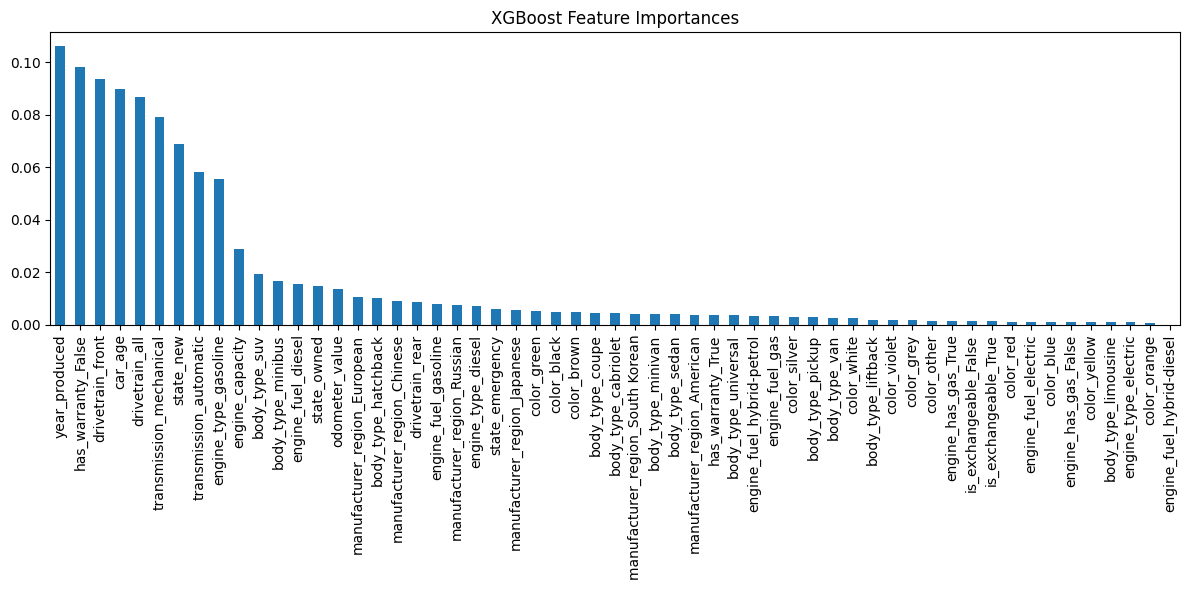

In [60]:
importances = best_model.feature_importances_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
feat_imp.plot(kind='bar', figsize=(12, 6))
plt.title('XGBoost Feature Importances')
plt.tight_layout()
plt.show()

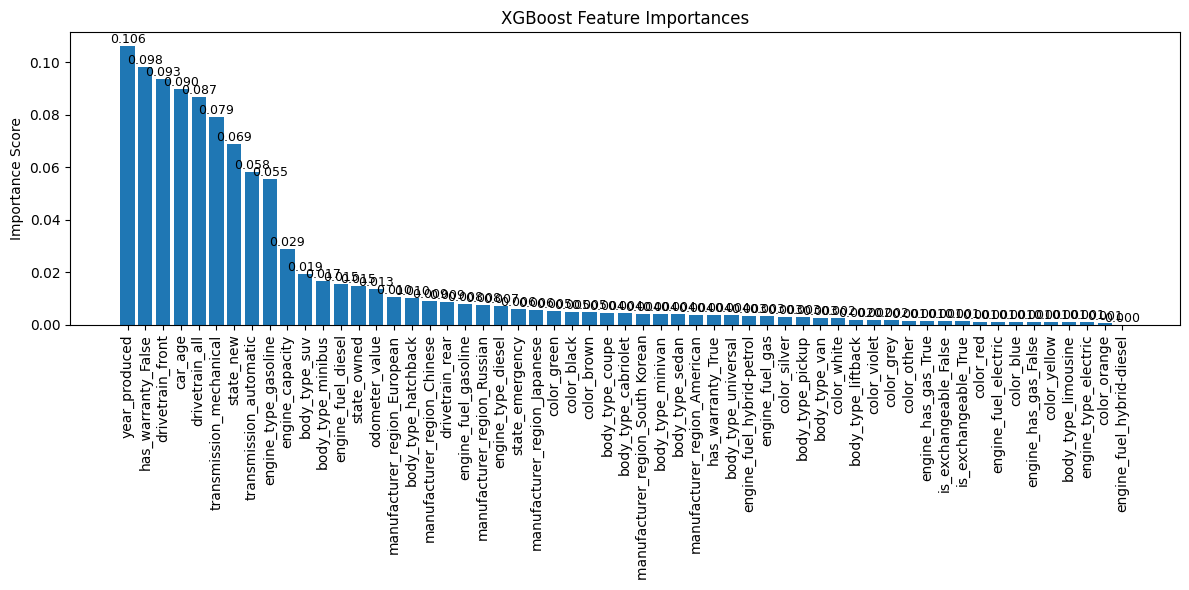

In [61]:
# Assuming you already have feature importances in feat_imp
feat_imp = pd.Series(best_model.feature_importances_, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(feat_imp.index, feat_imp.values)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x position
        height,                            # y position
        f'{height:.3f}',                   # text (3 decimal places)
        ha='center', va='bottom', fontsize=9
    )

plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('XGBoost Feature Importances')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()